# Unit 2.5.3

In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Dimensionality Reduction in Linear Regression

The less features in a model, the simpler the model, the better.  

Variance in features unrelated to outcome $Y$ may create noise in prediction, especially if variance is shared among features in multicollinearity.
More features means more unrelated variance and thus more noise. 

Dimension reduction methods simplify the feature space while retaining all the predictive power of the original model.

The idea is to reduce a matrix of features $X$ into a matrix with fewer columns $R(X)$ where the expected value of $Y$ given $X$ ($E(Y|X)$) is equal to the expected value of $Y$ given $R(X)$. We say "expected value" rather than "predicted value" to be consistent with the commonly-used mathematical notation, but the meaning is the same – we want a smaller set of features that will produce the same predicted values for $Y$ as our larger number of features.

## Partial least squares regression
Like Principal Components Analysis, except dealing with covariance of $X$ and $Y$, not just variance in $X$.

PLSR first tries to find the vector within the $n$-dimenial space of $X$ with the highest covariance with *y*. The it looks for a second vector, perpendicular to the first, that explains the highest covariance with *y* that remains after accounting for the first vector.  This continues for as many components as we permit, up to *n*.

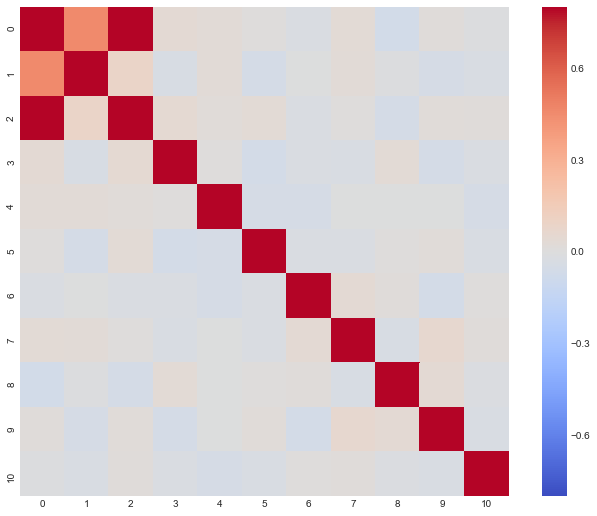

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, vmin=-.8, square=True, cmap='coolwarm')
plt.show()

In [3]:
X[:,0]

array([ -5.21226224e-01,  -4.29088736e-01,   1.79461348e-01,
         2.02489788e-01,   5.67163734e-01,   7.27282903e-01,
        -1.74350524e+00,  -1.59857483e+00,   2.80038684e-03,
        -5.49302990e-01,  -1.05145500e+00,   5.41867638e-01,
         5.22132932e-01,  -1.50828594e+00,  -2.26098256e-01,
        -7.30782255e-01,  -1.12876310e+00,  -4.12986946e-01,
         1.08784325e+00,   5.73315157e-01,  -1.12039289e+00,
        -1.39143657e-02,  -1.31970800e+00,  -1.94855643e+00,
         1.03331621e-01,   1.43085348e+00,  -4.21532262e-02,
         5.26895895e-01,  -1.28924093e+00,   5.84962911e-01,
         7.04255999e-01,  -9.05656995e-01,  -8.30065011e-01,
         1.39333342e+00,  -2.64259710e+00,  -4.20237101e-01,
        -2.58172084e+00,  -9.80993625e-01,   9.25549201e-01,
        -2.13067486e-01,   1.15919248e-01,   1.95566631e+00,
         2.79420047e-01,   3.76345693e-01,   6.56009266e-03,
        -5.60824006e-01,   1.58705570e+00,   7.54498466e-01,
         5.85919023e-02,

In [4]:
y

array([  2.28782811,   6.79787502,   6.70457305,   4.57229444,
         6.00310098,  10.9939116 ,   1.83202268,   2.10753747,
         4.75003294,   5.83075819,   2.30766327,   6.26100376,
         5.69222688,  -0.99254095,   2.94931554,   2.66635368,
         4.5462792 ,   5.68468504,   3.916793  ,   3.80301745,
        -0.80893916,   2.13703917,   1.7222123 ,   3.9759872 ,
         7.43798104,   4.85209374,   6.06121053,   3.19555915,
         2.29993726,   7.2860622 ,   8.31223675,   4.41746512,
         3.09830444,   7.06166626,   6.32947636,   6.87654479,
         1.8677039 ,   3.55943092,   4.78690059,   5.59822703,
         4.01870025,   5.48850481,   3.26261816,   3.64893231,
         7.4632711 ,   6.5095531 ,   9.47566856,   5.97956975,
         2.49390216,   5.14417885,   3.94063229,   6.25610279,
         2.74685548,   5.38440884,   6.96322462,   4.19227679,
         5.92736604,   8.72003199,   5.41416015,   5.32638749,
         5.52078973,   8.74103065,   6.90699697,   7.34

In [5]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

R-squared regression: 0.850990389599


In [6]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

R-squared PLSR: 0.850989873821


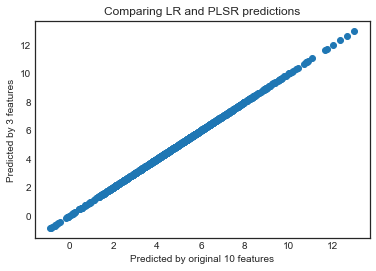

In [7]:
# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

PLSR will not work as well if features are uncorrelated, or if the only feature correlations are paired (feature 1 is only correlated with feature 2, feature 3 is only correlated with feature 4, etc).

The trick to successful PLSR is to select the right number of components to keep.  Use the cell below to create new partial least square regressions with different numbers of components, then see how those changes affect the ability of your models to reproduce the predicted Y values as well as the regular linear regression.  Typically, you would choose your components based on the number that gives the most consistent performance between training and test datasets.

Since this data is randomly generated, you can also play with it by changing how $y$ is computed, then observing how different relationships between $y$ and $X$ play out in PLSR.

In [8]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 7 dimensions.
pls2 = PLSRegression(n_components=7)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_pred2 = pls2.predict(X)
print('R-squared PLSR:', pls2.score(X, y))

R-squared PLSR: 0.850990389599


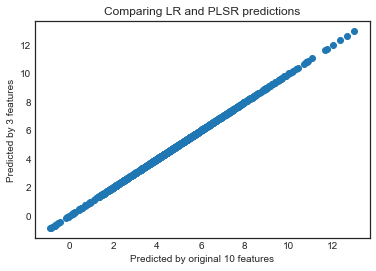

In [9]:
# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred2) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [10]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls3 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls3.fit(X, y)

# Save predicted values.
Y_PLS_pred3 = pls3.predict(X)
print('R-squared PLSR:', pls3.score(X, y))

R-squared PLSR: 0.845828031923


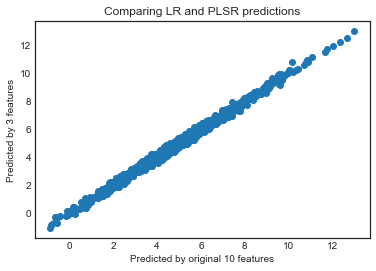

In [11]:
# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred3) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [18]:
# Create normally distributed outcome related to parameters but with noise.
y2 = X[:, 0] * 3 + -2 * X[:,5] + np.random.normal(size=n * 1) + 5

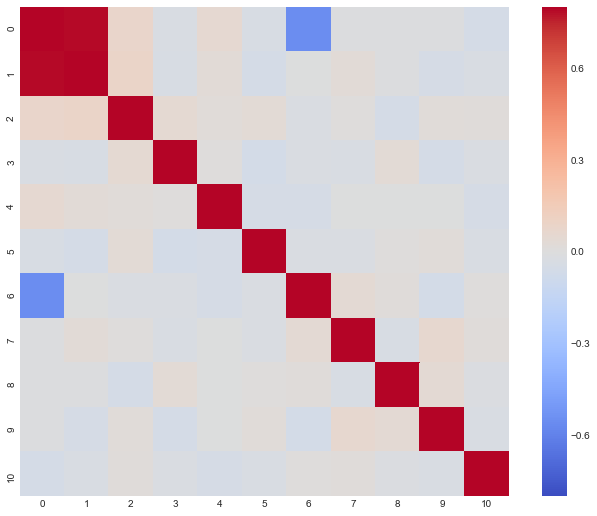

In [20]:
# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y2, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, vmin=-.8, square=True, cmap='coolwarm')
plt.show()

In [26]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y2)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y2))

R-squared regression: 0.928622505366


In [29]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls4 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls4.fit(X, y2)

# Save predicted values.
Y_PLS_pred4 = pls4.predict(X)
print('R-squared PLSR:', pls4.score(X, y2))

R-squared PLSR: 0.92862163047


# Unit 2.5.4

So far when explaining how regression works, we've said that it finds the model of best fit by minimizing the squared distance between each datapoint and the line of fit.  Squaring the distance removes concerns about positive vs negative signs, and has a heavier penalty for larger distances.  

The cost function for a linear regression model $y_i = \alpha + \beta x_i$ is:

$$\frac1{n}\sum_{i=1}^n(y_i-(\alpha + \beta x_i))^2$$

where $\alpha + \beta x_i$ is the prediction of the model $\alpha + \beta x$ for predictors $x_i$, $y_i$ is the actual outcome value, and $n$ is the number of distances being summed.

For many linear regressions, the model is sufficiently simple that the true minimum of the cost function can be calculated by solving a system of equations.  However, many other models that we will encounter from this point forward are _too complex_ to be solved for a true minimum.  **For those models it's useful to use an iterative algorithm that starts from a random set of parameters and slowly works toward optimizing the cost function.**

## Gradient Descent Algorithm

**Gradient descent** iteratively minimizes the cost function using derivatives.  This approach is robust and flexible, and can be applied to basically any differentiable function.

When optimizing a linear regression, the dimensions of the space correspond to the number of parameters in the equation, plus the error function we are trying to minimize.  So a model $y_i = \alpha + \beta x_i$ with two parameters would yield a three-dimensional space.  Within that space is a *surface* made up of all  possible combinations of parameter values, and the error values that result when we plug those parameters into the cost function. 

The gradient descent algorithm works iteratively by picking a location on the surface defined by a combination of parameter values, calculating the direction from that point with the steepest 'downhill' gradient, and then moving 'downhill' a set distance.  Then the algorithm picks up the new parameter values of that location on the surface, re-calculates the direction of 'downhill' and moves a set distance again.  The algorithm will repeat this until it finds a location on the surface where all possible gradients away from that location are "uphill": in other words, where all other possible combinations of parameters result in higher error values.  **The parameter values that define the location at the lowest point of the space represent the "optimized" solution to the cost function, and are what the regression returns as a solution.**

The direction of "downhill" is determined by differentiating the cost function and taking the partial derivative of each parameter of the regression equation. A function is "differentiable" if a derivative can be calculated at each value of the function. A derivative, in turn, is a measure of how sensitive a quantity is to change in another quantity.

For our two-parameter regression line model, the derivatives are:

$$\frac{\partial}{\partial\alpha} =\frac2n \sum_{i=1}^n - (y^i-(\alpha + \beta x_i) )$$

$$\frac{\partial}{\partial\beta} =\frac2n \sum_{i=1}^n - x_i(y^i-(\alpha + \beta x_i))$$

One partial derivative for each parameter in the function.

## Decision-points in Gradient Descent

There are three elements of the gradient descent algorithm that require decisions on the part of the operator.  


### What are the starting values of the parameters?   

Many implementations will start by setting all parameters to zero.  However, this isn't a requirement of the algorithm, and sometimes other starting points may be desirable.


### How far do we "move downhill" after each iteration?

Also called the "learning rate."  A too-small learning rate means the model will be computationally inefficient and take a long time to converge (stop).  A too-large learning rate can result in overshooting the target minimum, resulting in a model that _never_ converges.  Again, most algorithm implementations have pre-determined criteria for setting the learning rate, but these can also be set manually.


### When do we stop?

In the description above, it sounds like the model runs until it reaches the "optimal" solution.  In reality, this isn't computationally efficient.  As the gradient flattens out and we get closer and closer to the minimum value of the error, each iteration of the algorithm will result in a smaller and smaller change in the error.  This can get really slow.  Typically some "minimal acceptable change" is decided on a-priori – once the change in error from iteration n-1 to iteration n is smaller than the threshold, the algorithm stops.  To prevent an algorithm that never stops, there is usually also a maximum number of permitted iterations before the gradient stops, even if it hasn't achieved a change under the threshold.

## Guts of Gradient Descent

Let's walk through programming a gradient descent algorithm in Python.  There are packages that will do this for you, but for now we'll try it from scratch.

In [31]:
# Time to make some data!
np.random.seed(6552)
x = np.random.normal(0, 1, 100)
y = x * 2 + np.random.sample(100)

print(x[1:5])
print(y[1:5])

[ 0.25329006 -1.76737758  0.34182384 -0.53994304]
[ 1.14786089 -3.00490556  1.13006624 -0.55567587]


In [36]:
# Fit an true minimum regression using solved equations.
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)



Coefficients from sklearn: 
 [[ 2.01383278]]

Intercept from sklearn: 
 [ 0.51816714]


Using sklearn, we find that the intercept $\alpha$ is 0.518 and the coefficient $\beta$ is 2.014.

Let's try to recreate this using Gradient Decent.

In [46]:
## Cost function for the linear regression that we will try to optimize.
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data.
    
    Alpha and beta are the coeficients that describe the fit line line, while
    x and y are lists or arrays with the x and y value of each data point.
    '''
    error = 0
    n = len(x)
    
    # Calculating cost using cost function
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2
        error += point_error
    return error / n

print(LR_cost_function(0,0,x,y))
print(LR_cost_function(1,1,x,y))
print(LR_cost_function(1,2,x,y))


4.48326224022
1.33402896866
0.310010045802


When alpha is 1 and beta is 2, the error is 0.3100.  Pretty good!

In [37]:
# Function we'll call each iteration (or step) of the gradient algorithm.
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one.'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        # Partial derivative of the intercept.
        point_alpha = -(2 / n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # Partial derivative of the slope.
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha 
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

In [56]:
# These constants correspond to the decision-points described above.
# How many steps to take.
stop = 1000

# How far to move with each step.
learning_rate = .005

# Starting values for intercept and slope 
alpha_start = 0
beta_start = 0

In [42]:
# Let's use a chunk of our data to see the first 10 steps of Gradient Descent!
#Notice how starting from alpha = 0 and beta = 0, we get closer to the true coefficients with each step

for i in range(10):
    alpha, beta = step(alpha,beta,learning_rate,x,y)
    print('step: {}\talpha: {:.3f}\tbeta: {:.3f}'.format(i,alpha,beta))

step: 0	alpha: 0.201	beta: 0.755
step: 1	alpha: 0.205	beta: 0.768
step: 2	alpha: 0.208	beta: 0.780
step: 3	alpha: 0.211	beta: 0.793
step: 4	alpha: 0.215	beta: 0.805
step: 5	alpha: 0.218	beta: 0.817
step: 6	alpha: 0.221	beta: 0.830
step: 7	alpha: 0.224	beta: 0.842
step: 8	alpha: 0.227	beta: 0.854
step: 9	alpha: 0.230	beta: 0.865


Now let's do all 1000 steps!


Coefficients from gradient descent algorithm: 
 2.01375792053

Intercept from gradient descent algorithm: 
 0.518158009671


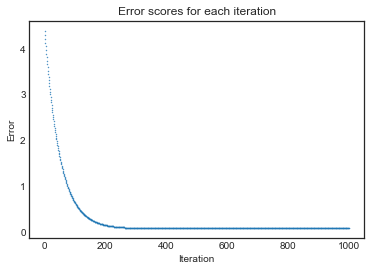

In [53]:
# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.

# Storing each iteration to inspect later.
all_error=[]

# Provide starting values.
alpha = alpha_start
beta = beta_start

#Run the algorithm.
for iter in range(stop):
    
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error.
    error = LR_cost_function(alpha, beta, x, y)
    
    # Store the error to instpect later.
    all_error.append(error)

    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error, 'o', ms=.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()

The coefficent and intercept calculated from gradient descent algorithm is pretty close to the one calculated from sklearn. We can also see that, at around step 300, the errors start to look constant.

In [124]:
# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.

# Storing each iteration to inspect later.
all_error=[]

# Provide starting values.
alpha = alpha_start
beta = beta_start

#Count steps
steps = 0

# Stops
stop = 10

#Run the algorithm.

# Setting an arbitruary starting point for the error_diff to get while loop started.
    
for iter in range(stop):

    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)

    # Calculate the error.
    error = LR_cost_function(alpha, beta, x, y)

    # Store the error to instpect later.
    all_error.append(error)

    # Calculate difference between iterations
    error_diff = all_error[iter - 1] - error
    # Count step
    steps += 1
    
    print('\nStep number: ', steps)
    print('Coefficients: ', beta)
    print('Intercept: ', alpha)
    print('Error for this step: ', error)
    print('Error for last step: ', all_error[iter - 1])
    print('Difference in error of last iterations: ', error_diff)

    if error_diff < -1:
        break 

    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

print('\nSteps taken by gradient descent algorithm: ', steps)
print('\nDifference between last iterations: ', error_diff)


Step number:  1
Coefficients:  0.0204581473556
Intercept:  0.00550909464785
Error for this step:  4.39394250354
Error for last step:  4.39394250354
Difference in error of last iterations:  0.0

Step number:  2
Coefficients:  0.0407084243953
Intercept:  0.0109597721184
Error for this step:  4.30643395225
Error for last step:  4.39394250354
Difference in error of last iterations:  0.087508551287

Step number:  3
Coefficients:  0.0607529436361
Intercept:  0.0163526503805
Error for this step:  4.22069985563
Error for last step:  4.30643395225
Difference in error of last iterations:  0.0857340966271

Step number:  4
Coefficients:  0.0805937961225
Intercept:  0.0216883408797
Error for this step:  4.13670422791
Error for last step:  4.22069985563
Difference in error of last iterations:  0.0839956277186

Step number:  5
Coefficients:  0.100233051644
Intercept:  0.0269674486074
Error for this step:  4.05441181322
Error for last step:  4.13670422791
Difference in error of last iterations:  0.08